## Introducción

¡Bienvenido a este Notebook! Este es el proyecto Capstone para el curso de Ciencia de Datos de IBM en Coursera.

En este notebook vamos a tratar de analizar los municipios de la ciudad de Valladolid en España, con el objetivo de saber dónde es adecuado 
abrir un nuevo restaurante.

Valladolid es una ciudad muy gastronómica con un amplio surtido de locales destinados a ello.
Nuestra intención, a través de los datos, será conseguir analizar qué municipios del extrarradio han crecido más en los últimos años, 
y valorar la competencia ya existente en ellos a través de la API de Foursquare.

En base a nuestros datos, determinaremos con Machine Learning, qué crecimiento podrían tener los municipios en los próximos años para facilitar nuestra decisión.

Finalizarémos dando el resultado objetivo, y justificando porqué sería óptimo abrir un restaurante en la Provincia. Esto le puede servir a futuros
inversores, o propietarios de negocios gastronómicos que busquen una localización para su nuevo negocio.

Nota: Por favor, vea los cuadernos a través de este enlace para representar los mapas de Folium: https://nbviewer.jupyter.org/

<img src="va.jpg" alt="Valladolid" width="1000" height="500">



## Datos

Vamos a utilizar varios conjuntos de datos. Entre ellos, los datos de migraciones de la ciudad de Valladolid hacia la comunidad urbana de la misma.

Estos datos han sido obtenidos desde la web oficial del Ayuntamiento de Valladolid.

Más adelante localizarémos por coordenadas, a través de Foursquare, qué restaurantes existen en cada zona.
Empecemos con los migratorios:

#### Estas son las librerías utilizadas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline
from geopy.geocoders import Nominatim
import folium
import requests
import json
from pandas.io.json import json_normalize


In [2]:
df = pd.read_csv("vaResi2.csv")  # Importamos los datos

In [3]:
df.head()

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aldeamayor de San Martín,77.0,39.0,51.0,79.0,73.0,99.0,84.0,97.0,114.0,...,113.0,121.0,118.0,81,141,140,128,133,130,160
1,Arroyo de la Encomienda,314.0,435.0,416.0,384.0,512.0,400.0,534.0,676.0,1110.0,...,796.0,659.0,738.0,553,544,487,650,574,417,594
2,Boecillo,100.0,97.0,88.0,120.0,159.0,160.0,170.0,118.0,110.0,...,87.0,92.0,79.0,70,66,92,69,91,88,103
3,Cabezón de Pisuerga,42.0,44.0,58.0,77.0,118.0,137.0,153.0,170.0,179.0,...,96.0,79.0,55.0,62,80,86,77,86,62,79
4,Castronuevo de Esgueva,2.0,16.0,15.0,11.0,14.0,10.0,11.0,20.0,8.0,...,4.0,6.0,12.0,3,4,3,10,11,10,16


In [4]:
df = df.dropna()  # Eliminamos los resultados que no contienen valor
df.tail()

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
18,Valdestillas,18.0,31.0,45.0,25.0,35.0,41.0,41.0,52.0,76.0,...,31.0,37.0,24.0,20,12,24,14,27,20,28
19,Viana de Cega,33.0,75.0,67.0,47.0,85.0,68.0,59.0,79.0,74.0,...,40.0,25.0,43.0,48,50,37,49,63,103,41
20,Villanubla,1.0,19.0,36.0,68.0,85.0,76.0,50.0,107.0,61.0,...,68.0,67.0,68.0,58,55,60,49,54,60,79
21,Villanueva de Duero,27.0,34.0,43.0,40.0,57.0,46.0,54.0,59.0,43.0,...,30.0,34.0,19.0,15,21,17,30,26,29,32
23,Zaratán,9.0,23.0,146.0,154.0,149.0,129.0,252.0,529.0,579.0,...,172.0,192.0,181.0,176,123,145,166,151,122,150


In [5]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').astype(int))  # Con esto damos forma a los datos, cambiando su tipo a números enteros

C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\572881042.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').astype(int))  # Con esto damos forma a los datos, cambiando su tipo a números enteros


In [6]:
df.head()

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aldeamayor de San Martín,77,39,51,79,73,99,84,97,114,...,113,121,118,81,141,140,128,133,130,160
1,Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,...,796,659,738,553,544,487,650,574,417,594
2,Boecillo,100,97,88,120,159,160,170,118,110,...,87,92,79,70,66,92,69,91,88,103
3,Cabezón de Pisuerga,42,44,58,77,118,137,153,170,179,...,96,79,55,62,80,86,77,86,62,79
4,Castronuevo de Esgueva,2,16,15,11,14,10,11,20,8,...,4,6,12,3,4,3,10,11,10,16


In [7]:
df = df.set_index("MUNICIPIO DE DESTINO")

In [8]:
df.tail()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Valdestillas,18,31,45,25,35,41,41,52,76,46,...,31,37,24,20,12,24,14,27,20,28
Viana de Cega,33,75,67,47,85,68,59,79,74,52,...,40,25,43,48,50,37,49,63,103,41
Villanubla,1,19,36,68,85,76,50,107,61,195,...,68,67,68,58,55,60,49,54,60,79
Villanueva de Duero,27,34,43,40,57,46,54,59,43,55,...,30,34,19,15,21,17,30,26,29,32
Zaratán,9,23,146,154,149,129,252,529,579,591,...,172,192,181,176,123,145,166,151,122,150


In [9]:
df["Total"] = df.sum(axis=1)  # Vamos a totalizar los resultados de los años desde 1997 al 2021, y así determinar qué municipios recibieron más migración

In [10]:
df.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Aldeamayor de San Martín,77,39,51,79,73,99,84,97,114,239,...,121,118,81,141,140,128,133,130,160,3544
Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,1185,...,659,738,553,544,487,650,574,417,594,16324
Boecillo,100,97,88,120,159,160,170,118,110,209,...,92,79,70,66,92,69,91,88,103,2867
Cabezón de Pisuerga,42,44,58,77,118,137,153,170,179,193,...,79,55,62,80,86,77,86,62,79,2542
Castronuevo de Esgueva,2,16,15,11,14,10,11,20,8,12,...,6,12,3,4,3,10,11,10,16,244


In [11]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_top5 = df.head()  # Hacemos un Top 5 de los municipios con más migración en su totalidad


In [12]:
df_top5 = df_top5.drop(["Total"], axis=1)

In [13]:
df_top5.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,1185,...,796,659,738,553,544,487,650,574,417,594
Laguna de Duero,370,892,867,890,1069,706,460,378,431,429,...,431,349,284,280,236,219,235,230,229,262
Cistérniga,142,418,534,255,319,304,531,597,543,555,...,235,247,186,186,163,185,174,123,133,161
Zaratán,9,23,146,154,149,129,252,529,579,591,...,172,192,181,176,123,145,166,151,122,150
Santovenia de Pisuerga,192,152,172,169,199,192,162,220,202,248,...,121,183,162,130,149,131,191,152,122,138


In [14]:
df_top5 = df_top5.transpose()
df_top5.head()

MUNICIPIO DE DESTINO,Arroyo de la Encomienda,Laguna de Duero,Cistérniga,Zaratán,Santovenia de Pisuerga
1997,314,370,142,9,192
1998,435,892,418,23,152
1999,416,867,534,146,172
2000,384,890,255,154,169
2001,512,1069,319,149,199


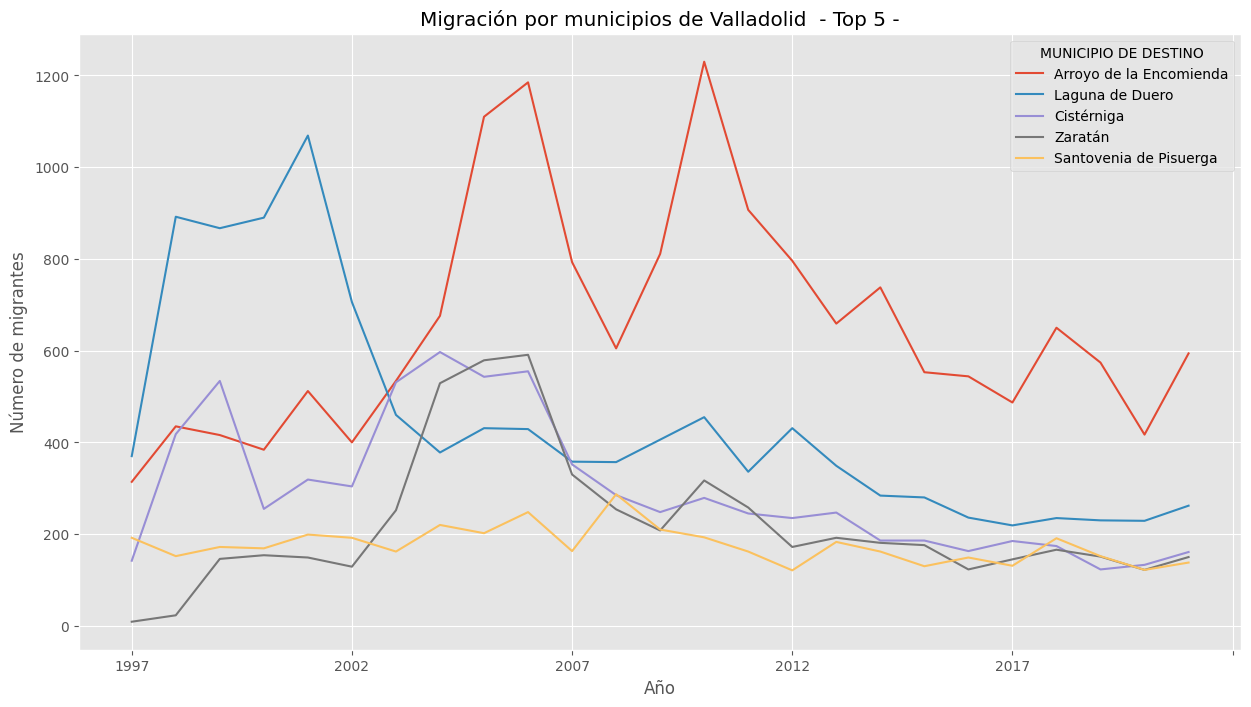

In [15]:
df_top5.plot(kind = "line", figsize=(15, 8))  # Vamosa graficar nuestro Top 5 para entender mejor los datos y determinar su crecimiento

plt.title('Migración por municipios de Valladolid  - Top 5 -')
plt.ylabel('Número de migrantes')
plt.xlabel('Año')

plt.show()

## Visualización y agrupación

Con el Top 5 realizado, ahora vamos a visualizar en un mapa las zonas de migración asignadas, y a comprobar qué tipo de competencia tenemos en base a los resultados obtenidos de ls web de FourSquare.
Esto nos facilitará bastante la visión de dónde poder establecer nuestro futuro negocio.

In [16]:
df_top5 = df_top5.transpose()  #  Devolvemos los datos a su forma anterior
df_top5.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,1185,...,796,659,738,553,544,487,650,574,417,594
Laguna de Duero,370,892,867,890,1069,706,460,378,431,429,...,431,349,284,280,236,219,235,230,229,262
Cistérniga,142,418,534,255,319,304,531,597,543,555,...,235,247,186,186,163,185,174,123,133,161
Zaratán,9,23,146,154,149,129,252,529,579,591,...,172,192,181,176,123,145,166,151,122,150
Santovenia de Pisuerga,192,152,172,169,199,192,162,220,202,248,...,121,183,162,130,149,131,191,152,122,138


In [17]:
dfcoords = df_top5.reset_index()
dfcoords.head()

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,...,796,659,738,553,544,487,650,574,417,594
1,Laguna de Duero,370,892,867,890,1069,706,460,378,431,...,431,349,284,280,236,219,235,230,229,262
2,Cistérniga,142,418,534,255,319,304,531,597,543,...,235,247,186,186,163,185,174,123,133,161
3,Zaratán,9,23,146,154,149,129,252,529,579,...,172,192,181,176,123,145,166,151,122,150
4,Santovenia de Pisuerga,192,152,172,169,199,192,162,220,202,...,121,183,162,130,149,131,191,152,122,138


In [18]:
#  Vamos a crear dos columnas nuevas (latitud y longitud), que nos dará la posición en coordenadas de nuestro Top 5 Municipios con mayor migración
numero = 0
for rows in dfcoords.iterrows():
    address = dfcoords["MUNICIPIO DE DESTINO"][numero]
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    dfcoords["latitude"] = latitude
    dfcoords["longitude"] = longitude
    numero = numero + 1

    


In [19]:
numero = 0
for rows in dfcoords.iterrows():
    address = dfcoords["MUNICIPIO DE DESTINO"][numero]
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    dfcoords["latitude"][numero] = latitude
    dfcoords["longitude"][numero] = longitude
    numero = numero + 1


C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\4212298516.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoords["latitude"][numero] = latitude
C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\4212298516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcoords["longitude"][numero] = longitude


In [20]:
dfcoords

,MUNICIPIO DE DESTINO,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2014,2015,2016,2017,2018,2019,2020,2021,latitude,longitude
0,Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,...,738,553,544,487,650,574,417,594,41.622128,-4.781396
1,Laguna de Duero,370,892,867,890,1069,706,460,378,431,...,284,280,236,219,235,230,229,262,41.582811,-4.721440
2,Cistérniga,142,418,534,255,319,304,531,597,543,...,186,186,163,185,174,123,133,161,41.612146,-4.685156
3,Zaratán,9,23,146,154,149,129,252,529,579,...,181,176,123,145,166,151,122,150,41.659455,-4.783320
4,Santovenia de Pisuerga,192,152,172,169,199,192,162,220,202,...,162,130,149,131,191,152,122,138,41.693651,-4.689599


In [21]:
address = 'Valladolid, ES'  # Obtenemos las coordenadas de la provincia

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Las coordenadas de Valladolid son {}, {}.'.format(latitude, longitude))

Las coordenadas de Valladolid son 41.6521328, -4.728562.


In [22]:

map_va = folium.Map(location=[latitude, longitude], zoom_start=12)  #  Agregamos un mapa general con la provincia de Valladolid

# añadir marcadores al mapa
for lat, lng, municipio, in zip(dfcoords['latitude'], dfcoords['longitude'], dfcoords['MUNICIPIO DE DESTINO']):
    label = '{}'.format(municipio)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=50,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_va)  
    
map_va

In [23]:
radius = 1000
LIMIT = 50
categories = 13065  # Este número equivale al ID de la categoría "Restaurante" en la API de Foursquare


In [24]:
lat = dfcoords["latitude"][0]  # Vamos a recuperar las coordenadas del primer Municipio del Dataframe
lng = dfcoords["longitude"][0]

In [25]:
url = 'https://api.foursquare.com/v3/places/search?ll={},{}&radius={}&categories={}&limit={}'.format( 
            lat, 
            lng, 
            radius,
            categories, 
            LIMIT)
headers = {
    "accept": "application/json",
    "Authorization": "fsq3uv87aaQglk+h/qREhs7bncouyW57D27afrKwjixSNno="
}

In [26]:
results = requests.get(url, headers=headers).json()

In [27]:
results["results"][0]  # Vamos a comprobar el formato del objeto JSON con el primer resultado

{'fsq_id': '51d46a518bbd0d1aa58b5ad0',
 'categories': [{'id': 13236,
   'name': 'Italian Restaurant',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 509,
 'geocodes': {'main': {'latitude': 41.619742, 'longitude': -4.776563}},
 'link': '/v3/places/51d46a518bbd0d1aa58b5ad0',
 'location': {'address': 'Calle Alonso de Ojeda, 12',
  'admin_region': 'Castilla y León',
  'country': 'ES',
  'formatted_address': 'Calle Alonso de Ojeda, 12, 47195 Arroyo de la Encomienda Castille and León',
  'locality': 'Arroyo de la Encomienda',
  'postcode': '47195',
  'region': 'Castille and León'},
 'name': 'La Commissione',
 'related_places': {},
 'timezone': 'Europe/Madrid'}

In [28]:
# Función para extraer la categoria del sitio
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
venues = results["results"] 
    
arroyo = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas

# filtrar columnas
filtered_columns = ['name', 'categories', 'geocodes.main.latitude', 'geocodes.main.longitude']
arroyo = arroyo.loc[:, filtered_columns]

# filtrar la categoría para cada fila
arroyo['categories'] = arroyo.apply(get_category_type, axis=1)

# limpiar columnas
arroyo.columns = [col.split(".")[-1] for col in arroyo.columns]

arroyo.head()

C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\3294022922.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  arroyo = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas


,name,categories,latitude,longitude
0,La Commissione,Italian Restaurant,41.619742,-4.776563
1,Ubi de la Vega,Pizzeria,41.614228,-4.785207
2,Urban Cafe,Bar,41.619308,-4.775097
3,Restaurante el Rincon Tablero,Spanish Restaurant,41.614278,-4.785265
4,La Tableria de la Flecha,Mediterranean Restaurant,41.624507,-4.775834


In [30]:
lat = dfcoords["latitude"][1]  # Vamos a recuperar las coordenadas del segundo Municipio del Dataframe, y así sucesivamente
lng = dfcoords["longitude"][1]
radius = 1000
LIMIT = 50
categories = 13065

url = 'https://api.foursquare.com/v3/places/search?ll={},{}&radius={}&categories={}&limit={}'.format( 
            lat, 
            lng, 
            radius,
            categories, 
            LIMIT)
headers = {
    "accept": "application/json",
    "Authorization": "fsq3uv87aaQglk+h/qREhs7bncouyW57D27afrKwjixSNno="
}

results = requests.get(url, headers=headers).json()

In [31]:
venues = results["results"] 
    
laguna = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas

# filtrar columnas
filtered_columns = ['name', 'categories', 'geocodes.main.latitude', 'geocodes.main.longitude']
laguna = laguna.loc[:, filtered_columns]

# filtrar la categoría para cada fila
laguna['categories'] = laguna.apply(get_category_type, axis=1)

# limpiar columnas
laguna.columns = [col.split(".")[-1] for col in laguna.columns]

laguna.head()

C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\1006371772.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  laguna = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas


,name,categories,latitude,longitude
0,El Paso,Spanish Restaurant,41.583034,-4.719591
1,Redburger,Bar,41.582399,-4.718289
2,Telepizza,Pizzeria,41.582619,-4.719607
3,Restaurante el Prado,Tapas Restaurant,41.590570,-4.725304
4,Bar Chaparral,Bar,41.583116,-4.721045


In [32]:
lat = dfcoords["latitude"][2]  
lng = dfcoords["longitude"][2]
radius = 1000
LIMIT = 50
categories = 13065

url = 'https://api.foursquare.com/v3/places/search?ll={},{}&radius={}&categories={}&limit={}'.format( 
            lat, 
            lng, 
            radius,
            categories, 
            LIMIT)
headers = {
    "accept": "application/json",
    "Authorization": "fsq3uv87aaQglk+h/qREhs7bncouyW57D27afrKwjixSNno="
}

results = requests.get(url, headers=headers).json()

In [33]:
venues = results["results"] 
    
cister = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas

# filtrar columnas
filtered_columns = ['name', 'categories', 'geocodes.main.latitude', 'geocodes.main.longitude']
cister = cister.loc[:, filtered_columns]

# filtrar la categoría para cada fila
cister['categories'] = cister.apply(get_category_type, axis=1)

# limpiar columnas
cister.columns = [col.split(".")[-1] for col in cister.columns]

cister.head()

C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\2936604987.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  cister = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas


,name,categories,latitude,longitude
0,Elephant,Bar,41.612459,-4.682407
1,El Viejo Portazgo,Brasserie,41.611748,-4.686073
2,3 Elementos,Restaurant,41.612744,-4.686519
3,Las Chatas,Coffee Shop,41.612176,-4.683544
4,Bar la Cueva,Tapas Restaurant,41.614323,-4.687198


In [34]:
lat = dfcoords["latitude"][3]  
lng = dfcoords["longitude"][3]
radius = 1000
LIMIT = 50
categories = 13065

url = 'https://api.foursquare.com/v3/places/search?ll={},{}&radius={}&categories={}&limit={}'.format( 
            lat, 
            lng, 
            radius,
            categories, 
            LIMIT)
headers = {
    "accept": "application/json",
    "Authorization": "fsq3uv87aaQglk+h/qREhs7bncouyW57D27afrKwjixSNno="
}

results = requests.get(url, headers=headers).json()

In [35]:
venues = results["results"] 
    
zaratan = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas

# filtrar columnas
filtered_columns = ['name', 'categories', 'geocodes.main.latitude', 'geocodes.main.longitude']
zaratan = zaratan.loc[:, filtered_columns]

# filtrar la categoría para cada fila
zaratan['categories'] = zaratan.apply(get_category_type, axis=1)

# limpiar columnas
zaratan.columns = [col.split(".")[-1] for col in zaratan.columns]

zaratan.head()

C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\3076124765.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  zaratan = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas


,name,categories,latitude,longitude
0,Bar las Fuentes,Bar,41.658976,-4.783290
1,El Lagar de Zaratán,Restaurant,41.659931,-4.786386
2,Restaurante Asador Artesano,Restaurant,41.662415,-4.783958
3,Bowling Sportline,Bowling Alley,41.660525,-4.771898
4,McDonald's,Burger Joint,41.660450,-4.772007


In [36]:
lat = dfcoords["latitude"][4]  
lng = dfcoords["longitude"][4]
radius = 1000
LIMIT = 50
categories = 13065

url = 'https://api.foursquare.com/v3/places/search?ll={},{}&radius={}&categories={}&limit={}'.format( 
            lat, 
            lng, 
            radius,
            categories, 
            LIMIT)
headers = {
    "accept": "application/json",
    "Authorization": "fsq3uv87aaQglk+h/qREhs7bncouyW57D27afrKwjixSNno="
}

results = requests.get(url, headers=headers).json()

In [37]:
venues = results["results"] 
    
santo = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas

# filtrar columnas
filtered_columns = ['name', 'categories', 'geocodes.main.latitude', 'geocodes.main.longitude']
santo = santo.loc[:, filtered_columns]

# filtrar la categoría para cada fila
santo['categories'] = santo.apply(get_category_type, axis=1)

# limpiar columnas
santo.columns = [col.split(".")[-1] for col in santo.columns]

santo.head()

C:\Users\Jesús\AppData\Local\Temp\ipykernel_21308\3246839964.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  santo = json_normalize(venues) # Convertimos el objeto JSON en un dataframe de pandas


,name,categories,latitude,longitude
0,San Juan,Bar,41.694926,-4.687563
1,Erchus,Coffee Shop,41.690724,-4.679983
2,Bar-Restaurante el Esparragal,Restaurant,41.691895,-4.678003


In [38]:
#  Ahora juntaremos los 5 DataFrames
restaurants = pd.concat([arroyo, laguna, cister, zaratan, santo], axis = 0)

In [39]:
for lat, lng, categories, name in zip(restaurants['latitude'], restaurants['longitude'], restaurants['name'], restaurants['categories']):
    label = '{}, {}'.format(categories, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_va)  
    
map_va

## Metodología

Una vez obtenida la visualización real de nuestro problema de ciencia de datos, ahora nos toca determinar qué nos supone toda esta información. 
Para ello, contaremos con estimar nuestros datos para ver si son predecibles en un futuro.
Mirando el mapa anterior, nos sugiere la idea de comprobar con qué municipio podemos contar, excluyendo las competencias de otros negocios. En otras palabras, 
ya existiendo tanta competencia en ciertos municipios, ¿valdría la pena explorar el futuro de aquellos que no tienen tantos negocios?

Para ello, vamos a comprobar si podemos realizar algún tipo de regresión con los datos que tenemos. Más abajo se puede ver cómo no hay una regresión lineal clara de la evolución de los datos.

Es por eso que contarémos con el suavizado exponencial. Esto es otra técnica de Machine Learning en la cual utilizamos nuestros datos como series de predicción temporal.


In [40]:
df.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
MUNICIPIO DE DESTINO,,,,,,,,,,,,,,,,,,,,,
Arroyo de la Encomienda,314,435,416,384,512,400,534,676,1110,1185,...,659,738,553,544,487,650,574,417,594,16324
Laguna de Duero,370,892,867,890,1069,706,460,378,431,429,...,349,284,280,236,219,235,230,229,262,11159
Cistérniga,142,418,534,255,319,304,531,597,543,555,...,247,186,186,163,185,174,123,133,161,7400
Zaratán,9,23,146,154,149,129,252,529,579,591,...,192,181,176,123,145,166,151,122,150,5506
Santovenia de Pisuerga,192,152,172,169,199,192,162,220,202,248,...,183,162,130,149,131,191,152,122,138,4402


In [41]:
df = df.drop(["Total"], axis = 1)  #  Eliminamos nuestra columna "Total"

In [42]:
dfR = df.transpose()

In [43]:
dfR = dfR.reset_index()

In [44]:
dfR.rename(columns= {"index" : "years"}, inplace = True)

In [45]:
dfR.head()

MUNICIPIO DE DESTINO,years,Arroyo de la Encomienda,Laguna de Duero,Cistérniga,Zaratán,Santovenia de Pisuerga,Simancas,Tudela de Duero,Aldeamayor de San Martín,Cigales,...,Villanubla,Viana de Cega,Fuensaldaña,Villanueva de Duero,Valdestillas,Mucientes,Pedraja de Portillo (La),Castronuevo de Esgueva,Ciguñuela,Geria
0,1997,314,370,142,9,192,128,129,77,81,...,1,33,45,27,18,12,2,2,15,4
1,1998,435,892,418,23,152,129,171,39,122,...,19,75,13,34,31,5,4,16,16,3
2,1999,416,867,534,146,172,163,170,51,121,...,36,67,33,43,45,6,21,15,5,10
3,2000,384,890,255,154,169,145,152,79,133,...,68,47,55,40,25,5,3,11,3,14
4,2001,512,1069,319,149,199,290,200,73,124,...,85,85,59,57,35,7,17,14,10,7


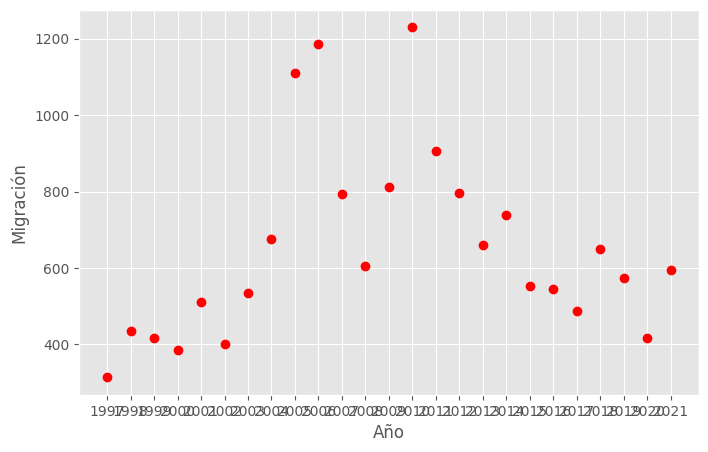

In [46]:
plt.figure(figsize=(8,5))  #  Visualizamos si hay una posibilidad de regresión lineal con los datos de un municipio
x_data, y_data = (dfR["years"].values, dfR["Arroyo de la Encomienda"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('Migración')
plt.xlabel('Año')
plt.show()

In [47]:
dfR.head()

MUNICIPIO DE DESTINO,years,Arroyo de la Encomienda,Laguna de Duero,Cistérniga,Zaratán,Santovenia de Pisuerga,Simancas,Tudela de Duero,Aldeamayor de San Martín,Cigales,...,Villanubla,Viana de Cega,Fuensaldaña,Villanueva de Duero,Valdestillas,Mucientes,Pedraja de Portillo (La),Castronuevo de Esgueva,Ciguñuela,Geria
0,1997,314,370,142,9,192,128,129,77,81,...,1,33,45,27,18,12,2,2,15,4
1,1998,435,892,418,23,152,129,171,39,122,...,19,75,13,34,31,5,4,16,16,3
2,1999,416,867,534,146,172,163,170,51,121,...,36,67,33,43,45,6,21,15,5,10
3,2000,384,890,255,154,169,145,152,79,133,...,68,47,55,40,25,5,3,11,3,14
4,2001,512,1069,319,149,199,290,200,73,124,...,85,85,59,57,35,7,17,14,10,7


In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [49]:
# Convertir la columna de fechas a tipo datetime
dfR["years"] = pd.to_datetime(dfR["years"])

# Establecer la columna de fechas como el índice del dataframe
dfR = dfR.set_index("years")

In [50]:
dfR.head()

MUNICIPIO DE DESTINO,Arroyo de la Encomienda,Laguna de Duero,Cistérniga,Zaratán,Santovenia de Pisuerga,Simancas,Tudela de Duero,Aldeamayor de San Martín,Cigales,Renedo de Esgueva,...,Villanubla,Viana de Cega,Fuensaldaña,Villanueva de Duero,Valdestillas,Mucientes,Pedraja de Portillo (La),Castronuevo de Esgueva,Ciguñuela,Geria
years,,,,,,,,,,,,,,,,,,,,,
1997-01-01,314,370,142,9,192,128,129,77,81,2,...,1,33,45,27,18,12,2,2,15,4
1998-01-01,435,892,418,23,152,129,171,39,122,40,...,19,75,13,34,31,5,4,16,16,3
1999-01-01,416,867,534,146,172,163,170,51,121,80,...,36,67,33,43,45,6,21,15,5,10
2000-01-01,384,890,255,154,169,145,152,79,133,59,...,68,47,55,40,25,5,3,11,3,14
2001-01-01,512,1069,319,149,199,290,200,73,124,66,...,85,85,59,57,35,7,17,14,10,7


In [51]:
dfR.index  #  Visualizamos el índice

DatetimeIndex(['1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', name='years', freq=None)

In [52]:
dfR = dfR.asfreq("YS")  #  Adoptamos la frecuancia del DataFrame a periodo anual

In [53]:
dfR.index

DatetimeIndex(['1997-01-01', '1998-01-01', '1999-01-01', '2000-01-01',
               '2001-01-01', '2002-01-01', '2003-01-01', '2004-01-01',
               '2005-01-01', '2006-01-01', '2007-01-01', '2008-01-01',
               '2009-01-01', '2010-01-01', '2011-01-01', '2012-01-01',
               '2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01',
               '2017-01-01', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01'],
              dtype='datetime64[ns]', name='years', freq='AS-JAN')

In [54]:
model = ExponentialSmoothing(endog = dfR["Arroyo de la Encomienda"]).fit()  #  Probamos a entrenar los datos de uno de los municipios de nuestro Top 5

In [55]:
predictions = model.forecast(steps=10)  #  Creamos una supuesta predicción a 10 años

## Resultados

Más abajo, en nuestra comparación de datos, podemos comprobar que nuestro modelo ha sabido adaptarse a los datos reales. Pero, la predicción ha resultado imprecisa, ya que se queda con el reflejo 
del último dato anual obtenido.

Cuando esto sucede, es debido a la falta de temporalidad de los datos. Al tener solamente los datos en periodos anuales, el modelo se ajusta "a ciegas". En cambio, si tuvieramos unos datos mensuales
de la migración de cada municipio, podríamos observar claramente una precisión más ajustada.

Text(0.5, 1.0, 'Predicción Arroyo de la Encomienda')

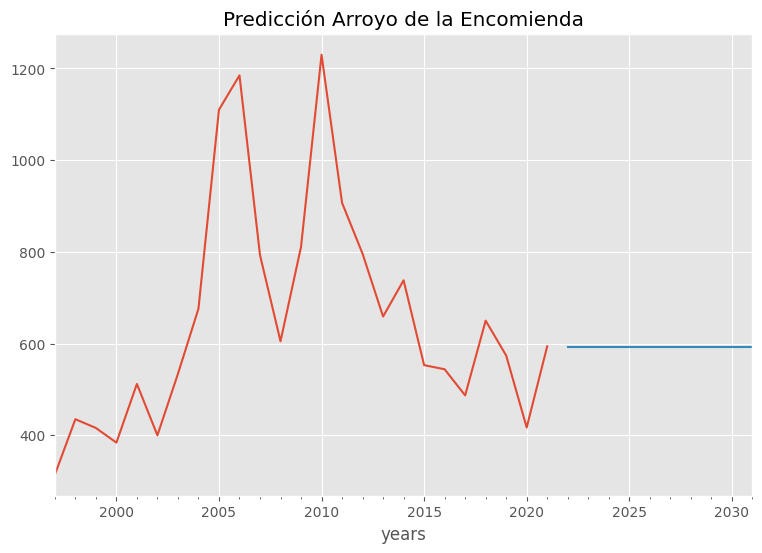

In [56]:
dfR["Arroyo de la Encomienda"].plot(figsize = (9, 6))
predictions.plot()
plt.title("Predicción Arroyo de la Encomienda")

In [57]:
dfR.head()

MUNICIPIO DE DESTINO,Arroyo de la Encomienda,Laguna de Duero,Cistérniga,Zaratán,Santovenia de Pisuerga,Simancas,Tudela de Duero,Aldeamayor de San Martín,Cigales,Renedo de Esgueva,...,Villanubla,Viana de Cega,Fuensaldaña,Villanueva de Duero,Valdestillas,Mucientes,Pedraja de Portillo (La),Castronuevo de Esgueva,Ciguñuela,Geria
years,,,,,,,,,,,,,,,,,,,,,
1997-01-01,314,370,142,9,192,128,129,77,81,2,...,1,33,45,27,18,12,2,2,15,4
1998-01-01,435,892,418,23,152,129,171,39,122,40,...,19,75,13,34,31,5,4,16,16,3
1999-01-01,416,867,534,146,172,163,170,51,121,80,...,36,67,33,43,45,6,21,15,5,10
2000-01-01,384,890,255,154,169,145,152,79,133,59,...,68,47,55,40,25,5,3,11,3,14
2001-01-01,512,1069,319,149,199,290,200,73,124,66,...,85,85,59,57,35,7,17,14,10,7


In [58]:
dfR["Modelo"] = model.fittedvalues

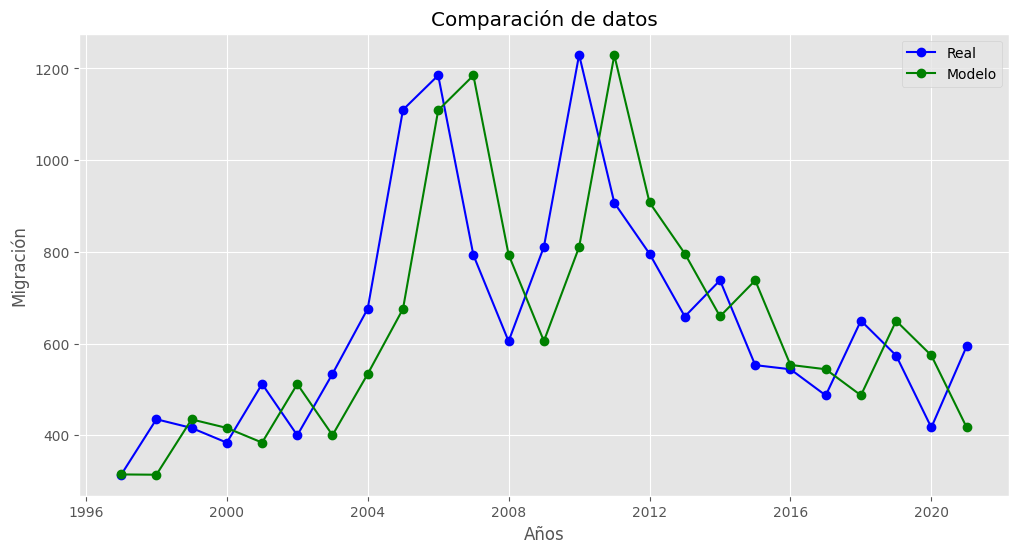

In [59]:
plt.figure(figsize = (12, 6))
plt.plot(dfR.index, dfR["Arroyo de la Encomienda"], "-o", color = "blue", label = "Real")
plt.plot(dfR["Modelo"], "-o", color = "green", label = "Modelo")

plt.xlabel("Años")
plt.ylabel("Migración")
plt.title("Comparación de datos")
plt.legend(loc = "best")
plt.show()

In [60]:
df_top5 = df_top5.transpose()
df_top5.head()


MUNICIPIO DE DESTINO,Arroyo de la Encomienda,Laguna de Duero,Cistérniga,Zaratán,Santovenia de Pisuerga
1997,314,370,142,9,192
1998,435,892,418,23,152
1999,416,867,534,146,172
2000,384,890,255,154,169
2001,512,1069,319,149,199


## Debate y Conclusiones

Aquí entra en juego nuestro juicio a la hora de analizar los datos. Podemos ver claramente como el municipio de Laguna de Duero tuvo un auge reconocible en la época de los 90, siendo así 
el claro municipio con alta competencia en negocios de restauración.

Vemos cómo en la década de los 2000, el municipio de Zaratán tuvo un alto índice de migración y se acomodaron varios negocios entonces. En búsquedas rápidas en google, se puede obtener que esto se debe
a que Zaratán en aquella época abrió uno de los centros comerciales más grandes de la provincia inaugurado en 2002.

En la década de 2010, vemos cómo Arroyo de la Encomienda recupera gran parte de la migración que había perdido unos pocos años antes. Esto también es debido a otra apertura de un gran centro comercial en 2010.
En aquel entonces fue el tercer centro comercial más grande de España, y claramente el más grande de la provincia de Valladolid hasta la fecha. Esto provocó que el anterior centro comercial mencionado anteriormente
fuese perdiendo interés, y sus locales gastonómicos fuesen menguando.

Tras ser el municipio con mayor migración de nuestro Top 5, y tras no tener tanta competencia gastronómica como Laguna de Duero, Arroyo de la Encomienda se encuentra en la decisión más clara para abrir un negocio de
restauración. También, pensando que muchos de los que ya existen son los que se encuentran dentro del propio centro comercial. Las calles del municipio que continúa ganando en migración, son las que se merecen, a mi modo
de ver las cosas, un nuevo restaurante para sus habitantes.

En futuras actualizaciones de datos, habría que observar cómo van evolucionando municipios como la Cistérniga, o Santovenia de Pisuerga. Incluso, con un conjunto de datos más certero, se podría preever el crecimiento de estos, y valorar futuras incorporaciones comerciales en los mismos. Siempre y cuando no se abra otro centro comercial nuevo.

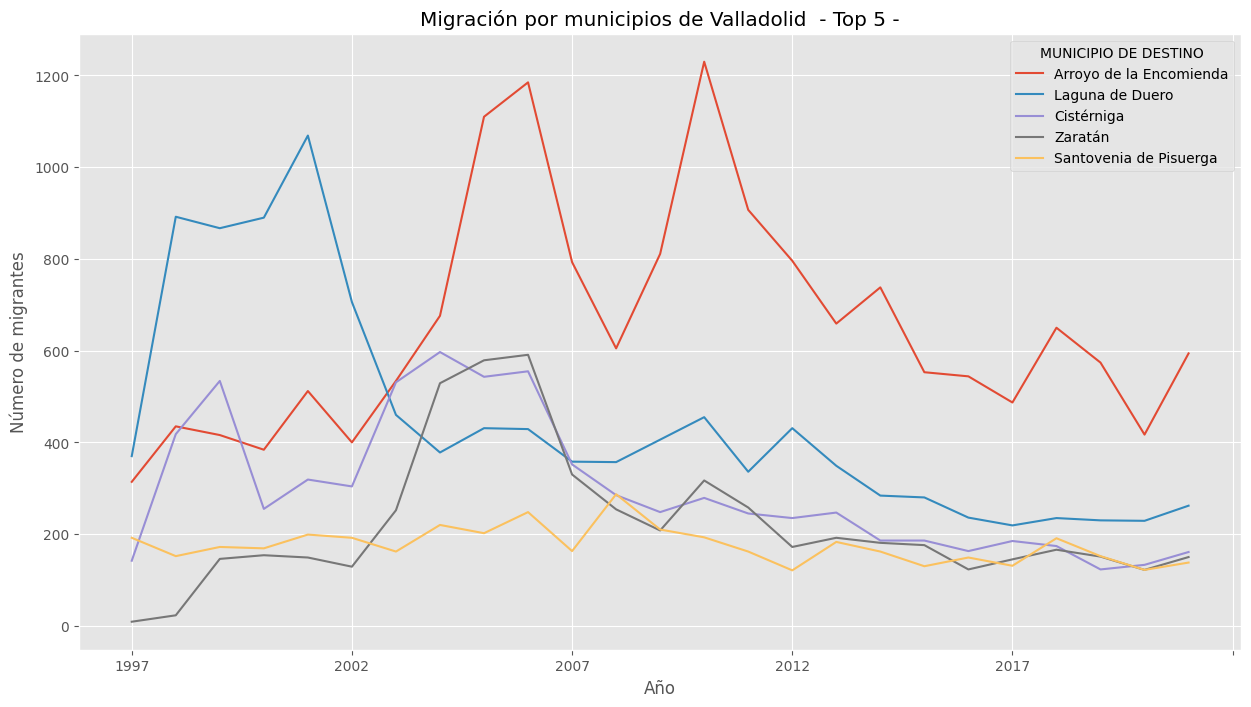

In [63]:
df_top5.plot(kind = "line", figsize=(15, 8))  # Vamosa graficar nuestro Top 5 para entender mejor los datos y determinar su crecimiento

plt.title('Migración por municipios de Valladolid  - Top 5 -')
plt.ylabel('Número de migrantes')
plt.xlabel('Año')

plt.show()